In [29]:
import numpy as np
import tensorflow as tf

corpus = "He is the king . The king is royal . She is the royal queen "
corpus_raw = corpus.lower() # converting to lowercase

In [30]:
print(corpus_raw.split())

['he', 'is', 'the', 'king', '.', 'the', 'king', 'is', 'royal', '.', 'she', 'is', 'the', 'royal', 'queen']


In [31]:
# cleaning the raw corpus and removing the duplicates
words = []
for word in corpus_raw.split():
    if word != '.': # we dont want to treat . as a word
        words.append(word)

words = set(words) # remove all the duplicate words
print(words)

{'royal', 'is', 'he', 'she', 'king', 'the', 'queen'}


In [32]:
word2int = {}
int2word = {}

vocab_size = len(words)

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word
    
print(word2int['queen'])

print(int2word[2])

6
he


In [33]:
# splitting the sentences into arrays
raw_sentences = corpus_raw.split('.')
sentences = []

for sentence in raw_sentences:
    sentences.append(sentence.split())
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [34]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index- WINDOW_SIZE, 0) : min(word_index+WINDOW_SIZE, len(sentence)) + 1]:
            if nb_word != word:
                data.append([word, nb_word])
print('Generating the word pair: ')
print(data)

Generating the word pair: 
[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [35]:
# now convert all to one_hot_vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input_word
y_train = [] # output_word

for data_word in data:
    x_train.append(to_one_hot( word2int[ data_word[0] ], vocab_size ) ) # convert to one_hot using the index returned from word2int
    y_train.append(to_one_hot( word2int[ data_word[1] ], vocab_size ) )
    
print(x_train)

[array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), 

In [36]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print('Converting to numpy array: ')
print(x_train)

Converting to numpy array: 
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [37]:
print(x_train.shape, y_train.shape)

(34, 7) (34, 7)


In [38]:
# we make tensorflow placeholders
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))
print(x.shape)

(?, 7)


In [39]:
# embedding networks weight and biases
EMBEDDING_DIM = 5

w1 = tf.Variable( tf.random_normal([vocab_size, EMBEDDING_DIM]) ) #weight
b1 = tf.Variable( tf.random_normal([EMBEDDING_DIM]) ) #bias

hidden_representation = tf.add( tf.matmul(x, w1), b1)

hidden_representation

<tf.Tensor 'Add_4:0' shape=(?, 5) dtype=float32>

In [40]:
w2 = tf.Variable( tf.random_normal([EMBEDDING_DIM, vocab_size]) )
b2 = tf.Variable( tf.random_normal( [vocab_size] ))

prediction = tf.nn.softmax( tf.add( tf.matmul(hidden_representation, w2), b2) )

In [41]:
# now we train the neural network
sess = tf.Session()
init = tf.global_variables_initializer()

sess.run(init)

In [42]:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]) )
print(cross_entropy_loss)
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

Tensor("Mean_3:0", shape=(), dtype=float32)


In [49]:
n_iters = 1000

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is: ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train} ) )

loss is:  1.3304023
loss is:  1.3303834
loss is:  1.3303648
loss is:  1.3303461
loss is:  1.3303273
loss is:  1.3303089
loss is:  1.3302904
loss is:  1.3302721
loss is:  1.3302536
loss is:  1.3302355
loss is:  1.3302172
loss is:  1.330199
loss is:  1.330181
loss is:  1.3301628
loss is:  1.3301449
loss is:  1.3301269
loss is:  1.3301091
loss is:  1.3300912
loss is:  1.3300734
loss is:  1.3300557
loss is:  1.3300381
loss is:  1.3300205
loss is:  1.3300029
loss is:  1.3299855
loss is:  1.3299681
loss is:  1.3299507
loss is:  1.3299335
loss is:  1.3299162
loss is:  1.3298991
loss is:  1.3298819
loss is:  1.3298649
loss is:  1.3298478
loss is:  1.3298309
loss is:  1.329814
loss is:  1.3297969
loss is:  1.3297801
loss is:  1.3297635
loss is:  1.3297467
loss is:  1.32973
loss is:  1.3297136
loss is:  1.329697
loss is:  1.3296804
loss is:  1.3296641
loss is:  1.3296477
loss is:  1.3296314
loss is:  1.3296152
loss is:  1.3295989
loss is:  1.3295827
loss is:  1.3295665
loss is:  1.3295505
loss i

loss is:  1.3257244
loss is:  1.3257183
loss is:  1.3257123
loss is:  1.3257062
loss is:  1.3257004
loss is:  1.3256944
loss is:  1.3256885
loss is:  1.3256826
loss is:  1.3256768
loss is:  1.325671
loss is:  1.325665
loss is:  1.3256592
loss is:  1.3256533
loss is:  1.3256475
loss is:  1.3256416
loss is:  1.3256358
loss is:  1.3256301
loss is:  1.3256242
loss is:  1.3256185
loss is:  1.3256128
loss is:  1.3256068
loss is:  1.3256012
loss is:  1.3255955
loss is:  1.3255898
loss is:  1.325584
loss is:  1.3255783
loss is:  1.3255727
loss is:  1.3255672
loss is:  1.3255613
loss is:  1.3255558
loss is:  1.3255501
loss is:  1.3255445
loss is:  1.3255389
loss is:  1.3255333
loss is:  1.3255277
loss is:  1.3255221
loss is:  1.3255167
loss is:  1.325511
loss is:  1.3255054
loss is:  1.3254998
loss is:  1.3254943
loss is:  1.3254889
loss is:  1.3254833
loss is:  1.325478
loss is:  1.3254725
loss is:  1.3254671
loss is:  1.3254614
loss is:  1.3254559
loss is:  1.3254505
loss is:  1.3254452
loss 

loss is:  1.3239012
loss is:  1.3238984
loss is:  1.3238956
loss is:  1.323893
loss is:  1.3238902
loss is:  1.3238873
loss is:  1.3238848
loss is:  1.3238821
loss is:  1.3238794
loss is:  1.3238765
loss is:  1.3238739
loss is:  1.3238713
loss is:  1.3238685
loss is:  1.3238658
loss is:  1.323863
loss is:  1.3238604
loss is:  1.3238577
loss is:  1.323855
loss is:  1.3238522
loss is:  1.3238497
loss is:  1.3238469
loss is:  1.3238442
loss is:  1.3238416
loss is:  1.323839
loss is:  1.3238363
loss is:  1.3238336
loss is:  1.323831
loss is:  1.3238286
loss is:  1.3238257
loss is:  1.323823
loss is:  1.3238205
loss is:  1.3238177
loss is:  1.3238152
loss is:  1.3238126
loss is:  1.3238099
loss is:  1.3238074
loss is:  1.3238047
loss is:  1.323802
loss is:  1.3237995
loss is:  1.3237969
loss is:  1.3237942
loss is:  1.3237916
loss is:  1.323789
loss is:  1.3237865
loss is:  1.3237839
loss is:  1.3237814
loss is:  1.3237787
loss is:  1.3237762
loss is:  1.3237734
loss is:  1.323771
loss is: 

In [44]:
print(sess.run(w1))

[[ 0.6498086  -0.02599468 -1.0065233  -0.2969453   1.2327303 ]
 [-1.4542571  -0.24381424 -0.44249138  2.0396478  -0.775131  ]
 [ 1.604984   -1.4088587  -0.6071881   0.65376556 -0.04239827]
 [ 1.133036   -1.4503956  -1.0482546   0.27575585  0.76120484]
 [ 2.0975735   0.1966244  -0.1668776   0.8896638  -1.0153365 ]
 [ 0.1985745   2.091998    1.4650571  -0.01343095  0.6470222 ]
 [ 0.5175359   0.23455393 -0.4997504   1.5356548  -1.0699085 ]]


In [45]:
vectors = sess.run(w1 + b1)
print(vectors)

[[ 0.33018282 -0.3630596  -1.0509413   0.17067128  1.7647479 ]
 [-1.7738829  -0.58087915 -0.4869095   2.5072644  -0.2431134 ]
 [ 1.2853583  -1.7459235  -0.6516062   1.1213821   0.4896193 ]
 [ 0.8134103  -1.7874606  -1.0926727   0.74337244  1.2932224 ]
 [ 1.7779478  -0.14044052 -0.21129571  1.3572804  -0.48331892]
 [-0.12105127  1.7549331   1.420639    0.45418563  1.1790397 ]
 [ 0.19791016 -0.10251099 -0.54416853  2.0032713  -0.5378909 ]]


In [46]:
print( vectors[ word2int['queen'] ] )

[ 0.19791016 -0.10251099 -0.54416853  2.0032713  -0.5378909 ]


In [47]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum( (vec1-vec2)**2 ) )

def find_closest(word_index, vectors):
    min_dist = 10000 # lo act like pos infinity
    min_index  = -1
    
    query_vector = vectors[word_index]
    
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
            
    return min_index

In [48]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])

queen
king
she


In [1]:
import matplotlib.pyplot as plt
def plot(embeddings,labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings!'
    for  i , label in enumerate(labels):
        x,y = embeddings[i,:]
        plt.scatter(x,y)
        plt.annotate(label, xy=(x,y), xytext=(5,2), textcoords='offset points',ha='right',va='bottom')

<IPython.core.display.Javascript object>


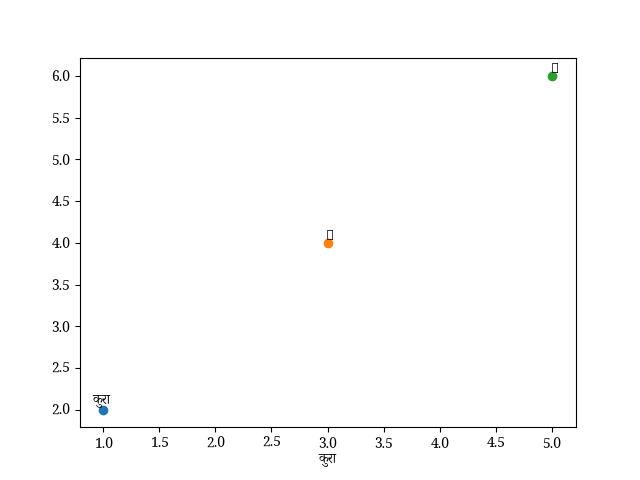

In [13]:
import numpy as np
xy = np.asarray([
    [1,2],
    [3,4],
    [5,6]
])
import matplotlib
%matplotlib notebook
matplotlib.rcParams['font.family'] = "Noto Serif Devanagari"
plt.xlabel(u'कुरा', name='Noto Serif Devanagari')
plot(xy, [u'कुरा','b','c'])
plt.show()